# Finding new app ideas - Analyzing the Google Play and Apple Store markets 

The aim of this project is to recommend the most profitable mobile application profile for the Google and Apple market. Working as data analyst for a company that builds Android and iOS mobile apps. The mission is to analyze data to help our developers understand what type of apps are likely to attract more users.

The company only builds apps that are free to download and install, and the main source of revenue consists of in-app ads. This means the revenue for any given app is mostly influenced by the number of users who use it, so the more users that see and engage with the ads, the better.

We'll analyze existing data about apps in Google Play and Apple Store. To make our recommendation, we'll try to find out:

* Which is the most common app genre in both markets
* Which is the most popular app genre in both markets
* Which genre has the least competition and could potentially bring a large number of user base

### Summary of Results

After analyzing the data, the conclusion we reached is that the company should develop an app that will combine provide the users an easy access to popular movies and series. It could be a platform where the users will be able to collaborate by writing reviews and rating movies or series. The user will be able to find, with a push of a button, the right place to stream or download any movie or series.

For more details, please refer to the the full analysis below.

## Opening and exploring existing datasets

As of the fourth quarter of 2019, Android users were able to choose between 2.57 million apps, making Google Play the app store with biggest number of available apps. Apple's App Store was the second-largest app store with almost 1.84 million available apps for iOS.
*Source: [Statistica](https://www.statista.com/statistics/276623/number-of-apps-available-in-leading-app-stores/)*

The following two data sets (Source: Kaggle) were used for the purpose of this project:
* A [data set](https://www.kaggle.com/lava18/google-play-store-apps) containing data about approximately 10,000 Android apps from Google Play; the data was collected on August 2018. You can download the data set directly from [this link](https://www.kaggle.com/lava18/google-play-store-apps/download).
* A [data set](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) containing data about approximately 7,000 iOS apps from the App Store; the data was collected on July 2017. You can download the data set directly from [this link](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/download).

Let's start by opening the two data sets and then continue with exploring the data.

In [1]:
## Import required libraries
from csv import reader
import matplotlib.pyplot as plt

## Open Apple Store dataset
### Create a list of lists for Apple Store data
opened_file = open('apple_store_data/AppleStore.csv')
reader_file = reader(opened_file)
ios_data = list(reader_file)
## Remove the first index column
for row in ios_data:
    del row[0]
### Keep only the header of the dataset
ios_header = ios_data[0]
### Remove the header from the dataset
ios_data = ios_data[1:]

## Open Google Play Store dataset
### Create a list of lists for Google Play Store data
opened_file = open('google_store_data/googleplaystore.csv')
reader_file = reader(opened_file)
google_data = list(reader_file)
### Keep only the header of the dataset
google_header = google_data[0]
### Remove the header from the dataset
google_data = google_data[1:]

In [2]:
## Function that will help print the rows of the dataset in a more readable way
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') # adds a new (empty) line after each row

    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

In [3]:
## Print the header, first 5 rows of Apple Store dataset. Also, print the total number of columns and rows
print(ios_header)
print('\n')
explore_data(ios_data, 0, 5, True)

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['281656475', 'PAC-MAN Premium', '100788224', 'USD', '3.99', '21292', '26', '4', '4.5', '6.3.5', '4+', 'Games', '38', '5', '10', '1']


['281796108', 'Evernote - stay organized', '158578688', 'USD', '0', '161065', '26', '4', '3.5', '8.2.2', '4+', 'Productivity', '37', '5', '23', '1']


['281940292', 'WeatherBug - Local Weather, Radar, Maps, Alerts', '100524032', 'USD', '0', '188583', '2822', '3.5', '4.5', '5.0.0', '4+', 'Weather', '37', '5', '3', '1']


['282614216', 'eBay: Best App to Buy, Sell, Save! Online Shopping', '128512000', 'USD', '0', '262241', '649', '4', '4.5', '5.10.0', '12+', 'Shopping', '37', '5', '9', '1']


['282935706', 'Bible', '92774400', 'USD', '0', '985920', '5320', '4.5', '5', '7.5.1', '4+', 'Reference', '37', '5', '45', '1']


Number of

In [4]:
## Print the header, first 5 rows of Google Play Store dataset. Also, print the total number of columns and rows
print(google_header)
print('\n')
explore_data(google_data, 0, 5, True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


['Pixel Draw - Number Art Coloring Book', 'ART_AND_DESIGN', '4.3', '967', '2.8M', '100,000+', 'Free', '0', 'Eve

### Dataset column information

#### Apple Store Column description

| Column          | Description                                     |
|:----------------|-------------------------------------------------|
| id              | App ID                                          |
| track_name      | App Name                                        |
| size_bytes      | Size (in Bytes)                                 |
| currency        | Currency Type                                   |
| price           | Price amount                                    |
| ratingcounttot  | User Rating counts (for all version)            |
| ratingcountver  | User Rating counts (for current version)        |
| user_rating     | Average User Rating value (for all version)     |
| userratingver   | Average User Rating value (for current version) |
| ver             | Latest version code                             |
| cont_rating     | Content Rating                                  |
| prime_genre     | Primary Genre                                   |
| sup_devices.num | Number of supporting devices                    |
| ipadSc_urls.num | Number of screenshots showed for display        |
| lang.num        | Number of supported languages                   |
| vpp_lic         | Vpp Device Based Licensing Enabled              |

#### Google Play Store Column description

| Column          | Description                                     |
|:----------------|-------------------------------------------------|
| App             | Application Name                                |
| Category        | Category the app belongs to                     |
| Rating          | Overall user rating of the app                  |
| Reviews         | Number of user reviews for the app              |
| Size            | Size of the app                                 |
| Installs        | Number of user downloads/installs for the app   |
| Type            | Paid or Free                                    |
| Price           | Price of the app                                |
| Content Rating  | Age group the app is targeted at                |
| Genres   | An app can belong to multiple genres (apart from main cat) |
| Last Updated    | Date when the app was last updated on Play Store |
| Current Ver     | Current version of the app                      |
| Android Ver     | Min required Android version                    |

Based on the above, the columns that are of interest are:

* Apple Store dataset:
   * track_name
   * price (we are interested only on free apps)
   * ratingcounttot
   * user_rating
   * cont_rating
   * prime_genre

* Google Play Store dataset:
   * App
   * Category
   * Rating
   * Reviews
   * Installs
   * Type (we are interested in free apps)
   * Price
   * Genres

## Data cleansing

### 1. Deleting Wrong data

Based on [this discussion](https://www.kaggle.com/lava18/google-play-store-apps/discussion/66015) row 10472 in Google Play Store dataset is wrong. Let's verify this and delete it from our dataset.

In [5]:
## Print the header, the wrong row and a correct row of Google Play Store dataset
print(google_header)
print('\n')
print(google_data[10472])
print('\n')
print(google_data[0])

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


As can be seen the following information are missing from row 10472:
- Category
- Genres

Let's proceed with deleting this entry from the dataset

In [6]:
## Delete row 10472 from google_data list
del google_data[10472]

### 2. Removing duplicate entries
Next step is to identify and remove any possible duplicate entries in both datasets.

In [7]:
## Identify if there are any duplicates in Google Play Store dataset
duplicate_apps = []
unique_apps = []

for app in google_data:
    name = app[0]
    if name in unique_apps:
        if name not in duplicate_apps:
            duplicate_apps.append(name)
    else:
        unique_apps.append(name)
        
print('Number of duplicate apps: ', len(duplicate_apps))
print('\n')
print('Number of unique apps: ', len(unique_apps))
print('\n')
print('Example of duplicate apps: ', duplicate_apps[:10])

Number of duplicate apps:  798


Number of unique apps:  9659


Example of duplicate apps:  ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Zenefits', 'Google Ads', 'Slack', 'FreshBooks Classic', 'Insightly CRM']


There are 798 unique duplicate apps in the Google Play Store dataset.
The total number of unique apps is 9659.

In [8]:
## Identify if there are any duplicates in Apple Store dataset
duplicate_apps = []
unique_apps = []

for app in ios_data:
    name = app[1]
    if name in unique_apps:
        if name not in duplicate_apps:
            duplicate_apps.append(name)
    else:
        unique_apps.append(name)
        
print('Number of duplicate apps: ', len(duplicate_apps))
print('\n')
print('Number of unique apps: ', len(unique_apps))
print('\n')
print('Example of duplicate apps: ', duplicate_apps[:10])

Number of duplicate apps:  2


Number of unique apps:  7195


Example of duplicate apps:  ['VR Roller Coaster', 'Mannequin Challenge']


There are 2 unique duplicate apps in the Apple Store dataset. The total number of unique apps is 7195

In [9]:
## Identify a pattern (Google Play Store) in order to justify a way to remove duplicate records
duplicate_apps = []
unique_apps = []

for app in google_data:
    name = app[0]
    if name in unique_apps:
        duplicate_apps.append(name)
    else:
        unique_apps.append(name)

## Print only the first 3 of the duplicate apps
for app in duplicate_apps[:3]:
    print(app)
    for google_entry in google_data:
        if app == google_entry[0]:
            print(google_entry)
    print('\n')

Quick PDF Scanner + OCR FREE
['Quick PDF Scanner + OCR FREE', 'BUSINESS', '4.2', '80805', 'Varies with device', '5,000,000+', 'Free', '0', 'Everyone', 'Business', 'February 26, 2018', 'Varies with device', '4.0.3 and up']
['Quick PDF Scanner + OCR FREE', 'BUSINESS', '4.2', '80805', 'Varies with device', '5,000,000+', 'Free', '0', 'Everyone', 'Business', 'February 26, 2018', 'Varies with device', '4.0.3 and up']
['Quick PDF Scanner + OCR FREE', 'BUSINESS', '4.2', '80804', 'Varies with device', '5,000,000+', 'Free', '0', 'Everyone', 'Business', 'February 26, 2018', 'Varies with device', '4.0.3 and up']


Box
['Box', 'BUSINESS', '4.2', '159872', 'Varies with device', '10,000,000+', 'Free', '0', 'Everyone', 'Business', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Box', 'BUSINESS', '4.2', '159872', 'Varies with device', '10,000,000+', 'Free', '0', 'Everyone', 'Business', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Box', 'BUSINESS', '4.2', '159872', 'Vari

In [10]:
## Identify a pattern (Apple Store) in order to justify a way to remove duplicate records
duplicate_apps = []
unique_apps = []

for app in ios_data:
    name = app[1]
    if name in unique_apps:
        duplicate_apps.append(name)
    else:
        unique_apps.append(name)

for app in duplicate_apps:
    print(app)
    for ios_entry in ios_data:
        if app == ios_entry[1]:
            print(ios_entry)
    print('\n')

VR Roller Coaster
['952877179', 'VR Roller Coaster', '169523200', 'USD', '0', '107', '102', '3.5', '3.5', '2.0.0', '4+', 'Games', '37', '5', '1', '1']
['1089824278', 'VR Roller Coaster', '240964608', 'USD', '0', '67', '44', '3.5', '4', '0.81', '4+', 'Games', '38', '0', '1', '1']


Mannequin Challenge
['1173990889', 'Mannequin Challenge', '109705216', 'USD', '0', '668', '87', '3', '3', '1.4', '9+', 'Games', '37', '4', '1', '1']
['1178454060', 'Mannequin Challenge', '59572224', 'USD', '0', '105', '58', '4', '4.5', '1.0.1', '4+', 'Games', '38', '5', '1', '1']




As can be seen above:
- There are 2 unique duplicate applications in the Apple Store dataset
- There are 798 unique duplicate applications in the Google Play dataset

To remove the duplicate applications for both Apple Store and Google Play Store, the method that will be used will be to identify which record has the highest count of reviews. In case of a tie, the record will be selected randomly.

As can be seen, the total number of reviews is what distinguishes the duplicate records. We can infer that the record with the highest review count is the latest and should be the one that is kept.

To perform this:
- A dictionary should be prepared, where each key is a unique app name, and the value is the highest number of reviews of that app
- The dictionary should be used to create a new cleaned dataset, which will have only one entry per app

#### 2.1 Remove the duplicates from Google Play Store

In [11]:
## Build the dictionary for Google Play Store
max_reviews_google = {}

for app in google_data:
    name = app[0]
    n_reviews = float(app[3])
    if name in max_reviews_google and n_reviews > max_reviews_google[name]:
        max_reviews_google[name] = n_reviews
    elif name not in max_reviews_google:
        max_reviews_google[name] = n_reviews

## Print the length of the dictionary (expected output is 9659)
print(len(max_reviews_google))

9659


The dictionary for the Google Play Store was prepared and it has a length of 9659, as expected.

In [12]:
## Remove the duplicates using the dictionary max_reviews_google
google_clean = []
already_added = []

for app in google_data:
    name = app[0]
    n_reviews = float(app[3])
    if n_reviews == max_reviews_google[name] and name not in already_added:
        google_clean.append(app)
        already_added.append(name)
        
## Explore the cleaned data set (print first 5 rows)
explore_data(google_clean, 0, 5, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


['Pixel Draw - Number Art Coloring Book', 'ART_AND_DESIGN', '4.3', '967', '2.8M', '100,000+', 'Free', '0', 'Everyone', 'Art & Design;Creativity', 'June 20, 2018', '1.1', '4.4 and up']


['Paper flowers instructions', 'ART_AND_DESIGN', '4.4', '167', '5.6M', '50,000+', 'Free', '0', 'Everyone', 'Art & Design', 'March 26, 2017', '1.0', '2.3 and up']


Number of rows: 9659
Number of columns: 13


#### 2.2 Remove the duplicates from Apple Store

In [13]:
## Build the dictionary for Apple Store
max_reviews_ios = {}

for app in ios_data:
    name = app[1]
    n_reviews = float(app[5])
    if name in max_reviews_ios and n_reviews > max_reviews_ios[name]:
        max_reviews_ios[name] = n_reviews
    elif name not in max_reviews_ios:
        max_reviews_ios[name] = n_reviews

## Print the length of the dictionary (expected output is 7195)
print(len(max_reviews_ios))

7195


The dictionary of Apple Store was prepared and it has a length of 7195, as expected.

In [14]:
## Remove the duplicates using the dictionary max_reviews_ios
ios_clean = []
already_added = []

for app in ios_data:
    name = app[1]
    n_reviews = float(app[5])
    if n_reviews == max_reviews_ios[name] and name not in already_added:
        ios_clean.append(app)
        already_added.append(name)
        
## Explore the cleaned data set (print first 5 rows)
explore_data(ios_clean, 0, 5, True)

['281656475', 'PAC-MAN Premium', '100788224', 'USD', '3.99', '21292', '26', '4', '4.5', '6.3.5', '4+', 'Games', '38', '5', '10', '1']


['281796108', 'Evernote - stay organized', '158578688', 'USD', '0', '161065', '26', '4', '3.5', '8.2.2', '4+', 'Productivity', '37', '5', '23', '1']


['281940292', 'WeatherBug - Local Weather, Radar, Maps, Alerts', '100524032', 'USD', '0', '188583', '2822', '3.5', '4.5', '5.0.0', '4+', 'Weather', '37', '5', '3', '1']


['282614216', 'eBay: Best App to Buy, Sell, Save! Online Shopping', '128512000', 'USD', '0', '262241', '649', '4', '4.5', '5.10.0', '12+', 'Shopping', '37', '5', '9', '1']


['282935706', 'Bible', '92774400', 'USD', '0', '985920', '5320', '4.5', '5', '7.5.1', '4+', 'Reference', '37', '5', '45', '1']


Number of rows: 7195
Number of columns: 16


### 3. Removing non-english applications

As our company only creates applications only with English speakers in mind, any application that does not have an English name should be removed from the dataset.

In [15]:
## Function that takes a string an returns "False" if there are at least 4 characters
## outside the ASCII range (0 - 127) in the string, otherwise returns "True"
def eng_check(input_name):
    count_non_english = 0
    for character in input_name:
        if ord(character) > 127:
            count_non_english += 1
    if count_non_english >= 4:
        return False
    else:
        return True
    

## Use the following examples to check the function
print(eng_check('Instagram'))
print(eng_check('爱奇艺PPS -《欢乐颂2》电视剧热播'))
print(eng_check('Docs To Go™ Free Office Suite'))
print(eng_check('Instachat 😜'))

True
False
True
True


Using the function above, both Google and Apple datasets should be filtered to remove any non-english application.

#### 3.1 Remove non-english apps from Google Play Store dataset

In [16]:
## Google Play Store (cleaned dataset)
### Remove the non-english apps
google_english_only = []
already_added = []

for app in google_clean:
    name = app[0]
    if eng_check(name) and name not in already_added:
        google_english_only.append(app)
        already_added.append(name)
        
## Explore the cleaned data set (print first 5 rows)
explore_data(google_english_only, 0, 5, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


['Pixel Draw - Number Art Coloring Book', 'ART_AND_DESIGN', '4.3', '967', '2.8M', '100,000+', 'Free', '0', 'Everyone', 'Art & Design;Creativity', 'June 20, 2018', '1.1', '4.4 and up']


['Paper flowers instructions', 'ART_AND_DESIGN', '4.4', '167', '5.6M', '50,000+', 'Free', '0', 'Everyone', 'Art & Design', 'March 26, 2017', '1.0', '2.3 and up']


Number of rows: 9614
Number of columns: 13


#### 3.2 Remove non-english apps from Apple Store dataset

In [17]:
## Apple Store (cleaned dataset)
### Remove the non-english apps
ios_english_only = []
already_added = []

for app in ios_clean:
    name = app[1]
    if eng_check(name) and name not in already_added:
        ios_english_only.append(app)
        already_added.append(name)
        
## Explore the cleaned data set (print first 5 rows)
explore_data(ios_english_only, 0, 5, True)

['281656475', 'PAC-MAN Premium', '100788224', 'USD', '3.99', '21292', '26', '4', '4.5', '6.3.5', '4+', 'Games', '38', '5', '10', '1']


['281796108', 'Evernote - stay organized', '158578688', 'USD', '0', '161065', '26', '4', '3.5', '8.2.2', '4+', 'Productivity', '37', '5', '23', '1']


['281940292', 'WeatherBug - Local Weather, Radar, Maps, Alerts', '100524032', 'USD', '0', '188583', '2822', '3.5', '4.5', '5.0.0', '4+', 'Weather', '37', '5', '3', '1']


['282614216', 'eBay: Best App to Buy, Sell, Save! Online Shopping', '128512000', 'USD', '0', '262241', '649', '4', '4.5', '5.10.0', '12+', 'Shopping', '37', '5', '9', '1']


['282935706', 'Bible', '92774400', 'USD', '0', '985920', '5320', '4.5', '5', '7.5.1', '4+', 'Reference', '37', '5', '45', '1']


Number of rows: 6181
Number of columns: 16


As can be seen, after the filtering of non-english applications, the total number of unique applications for Apple and Google are:
* Google: 9614
* Apple: 6181

This means that the number of non-english applications is:
* Google: 45
* Apple: 1014

### 4. Filter out non-free applications

As our company only creates free applications only , any application that costs to download and install should be removed from the dataset.

#### 4.1 Remove non-free apps from Google Play Store dataset

In [18]:
## Remove the non-free apps from Google Play Store dataset
google_final = []
already_added = []

for app in google_english_only:
    name = app[0]
    ### We need to remove the $ symbol from some entries to be able to convert them to float numbers
    price = float(app[7].replace('$', ''))
    if price == 0.00 and name not in already_added:
        google_final.append(app)
        already_added.append(name)
        
## Explore the final data set (print first 5 rows)
explore_data(google_final, 0, 5, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


['Pixel Draw - Number Art Coloring Book', 'ART_AND_DESIGN', '4.3', '967', '2.8M', '100,000+', 'Free', '0', 'Everyone', 'Art & Design;Creativity', 'June 20, 2018', '1.1', '4.4 and up']


['Paper flowers instructions', 'ART_AND_DESIGN', '4.4', '167', '5.6M', '50,000+', 'Free', '0', 'Everyone', 'Art & Design', 'March 26, 2017', '1.0', '2.3 and up']


Number of rows: 8864
Number of columns: 13


#### 4.2 Remove non-free apps from Apple Store dataset

In [19]:
## Remove the non-free apps from Apple Store dataset
ios_final = []
already_added = []

for app in ios_english_only:
    name = app[1]
    price = float(app[4])
    if price == 0.00 and name not in already_added:
        ios_final.append(app)
        already_added.append(name)
        
## Explore the final data set (print first 5 rows)
explore_data(ios_final, 0, 5, True)

['281796108', 'Evernote - stay organized', '158578688', 'USD', '0', '161065', '26', '4', '3.5', '8.2.2', '4+', 'Productivity', '37', '5', '23', '1']


['281940292', 'WeatherBug - Local Weather, Radar, Maps, Alerts', '100524032', 'USD', '0', '188583', '2822', '3.5', '4.5', '5.0.0', '4+', 'Weather', '37', '5', '3', '1']


['282614216', 'eBay: Best App to Buy, Sell, Save! Online Shopping', '128512000', 'USD', '0', '262241', '649', '4', '4.5', '5.10.0', '12+', 'Shopping', '37', '5', '9', '1']


['282935706', 'Bible', '92774400', 'USD', '0', '985920', '5320', '4.5', '5', '7.5.1', '4+', 'Reference', '37', '5', '45', '1']


['283646709', 'PayPal - Send and request money safely', '227795968', 'USD', '0', '119487', '879', '4', '4.5', '6.12.0', '4+', 'Finance', '37', '0', '19', '1']


Number of rows: 3220
Number of columns: 16


#### Final data set

Our final datasets contains unique, English and free applications that can be found in either Google Play Store or Apple Store. The number of entries for each dataset is:
* **Apple**: 3220 apps
* **Google**: 8864 apps

## Data exploration

### 1. Most common apps by Genre

As was mentioned in the introduction, the aim is to determine the kinds of apps that are likely to attract more users because the revenue is highly influenced by the number of people using the company's apps.

To minimize risks and overhead, the validation strategy for an app idea is comprised of three steps:

1. Build a minimal Android version of the app, and add it to Google Play Store.
2. If the app has a good response from users, the company develops it further.
3. If the app is profitable after six months, the company builds an iOS version of the app and adds it to the Apple Store.

Because the end goal is to add the app on both Google Play and the Apple Stores, it is needed to find app profiles that are successful on both markets. For instance, a profile that works well for both markets might be a productivity app that makes use of gamification.

Let's begin the analysis by getting a sense of what are the most common genres for each market.

In [20]:
## Function that returns the frequency table (as a dictionary) for any column of the dataset specified
## Frequencies are expressed in percentages
def freq_table(dataset, index):
    ### Create a dictionary for total count
    freq_dict = {}
    total = 0
    
    for row in dataset:
        total += 1
        category = row[index]
        if category in freq_dict:
            freq_dict[category] += 1
        else:
            freq_dict[category] = 1
            
    ### Create a dictionary for percentages
    freq_percent_dict = {}
    
    for key in freq_dict:
        percentage = (freq_dict[key] / total) * 100
        freq_percent_dict[key] = percentage
        
    return freq_percent_dict


## Function that generates a frequency table using the freq_table() function. 
## Transforms the frequency table into a list of tuples, then sorts the list in a descending order.
## Prints the entries of the frequency table in descending order.
def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)

    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0])

#### 1.1 Most common app genre in Google Play Store dataset

In [21]:
## Examine the frequency table (expressed in percentages) of Category in Google Play Store dataset
display_table(google_final, 1)

FAMILY : 18.907942238267147
GAME : 9.724729241877256
TOOLS : 8.461191335740072
BUSINESS : 4.591606498194946
LIFESTYLE : 3.9034296028880866
PRODUCTIVITY : 3.892148014440433
FINANCE : 3.7003610108303246
MEDICAL : 3.531137184115524
SPORTS : 3.395758122743682
PERSONALIZATION : 3.3167870036101084
COMMUNICATION : 3.2378158844765346
HEALTH_AND_FITNESS : 3.0798736462093865
PHOTOGRAPHY : 2.944494584837545
NEWS_AND_MAGAZINES : 2.7978339350180503
SOCIAL : 2.6624548736462095
TRAVEL_AND_LOCAL : 2.33528880866426
SHOPPING : 2.2450361010830324
BOOKS_AND_REFERENCE : 2.1435018050541514
DATING : 1.861462093862816
VIDEO_PLAYERS : 1.7937725631768955
MAPS_AND_NAVIGATION : 1.3989169675090252
FOOD_AND_DRINK : 1.2409747292418771
EDUCATION : 1.1620036101083033
ENTERTAINMENT : 0.9589350180505415
LIBRARIES_AND_DEMO : 0.9363718411552346
AUTO_AND_VEHICLES : 0.9250902527075812
HOUSE_AND_HOME : 0.8235559566787004
WEATHER : 0.8009927797833934
EVENTS : 0.7107400722021661
PARENTING : 0.6543321299638989
ART_AND_DESIGN : 

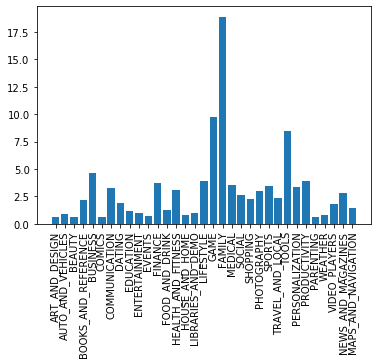

In [22]:
## Bar plot of the frequency table (expressed in percentages) of Category in Google Play Store dataset
%matplotlib inline
plt.bar(range(len(freq_table(google_final, 1))), list(freq_table(google_final, 1).values()), align='center')
plt.xticks(range(len(freq_table(google_final, 1))), list(freq_table(google_final, 1).keys()), rotation=90)
plt.show()

#### 1.2 Most common app genre in Apple Store dataset

In [23]:
## Examine the frequency table (expressed in percentages) of primary genre in Apple Store dataset
display_table(ios_final, 11)

Games : 58.13664596273293
Entertainment : 7.888198757763975
Photo & Video : 4.968944099378882
Education : 3.6645962732919255
Social Networking : 3.291925465838509
Shopping : 2.608695652173913
Utilities : 2.515527950310559
Sports : 2.142857142857143
Music : 2.049689440993789
Health & Fitness : 2.018633540372671
Productivity : 1.7391304347826086
Lifestyle : 1.5838509316770186
News : 1.3354037267080745
Travel : 1.2422360248447204
Finance : 1.1180124223602486
Weather : 0.8695652173913043
Food & Drink : 0.8074534161490683
Reference : 0.5590062111801243
Business : 0.5279503105590062
Book : 0.43478260869565216
Navigation : 0.18633540372670807
Medical : 0.18633540372670807
Catalogs : 0.12422360248447205


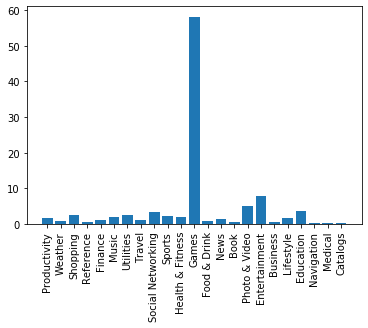

In [24]:
## Bar plot of the frequency table (expressed in percentages) of primary genre in Apple Store dataset
plt.bar(range(len(freq_table(ios_final, 11))), list(freq_table(ios_final, 11).values()), align='center')
plt.xticks(range(len(freq_table(ios_final, 11))), list(freq_table(ios_final, 11).keys()), rotation=90)
plt.show()

#### Conclusions for most common apps by genre

Games are dominating the Apple Store, as they accumulate almost 58% of the total applications. Second to that is Entertainment apps with almost 8%.
For Google Play Store, the difference is not so evident by the data. Most common apps are "Family", which account for almost 20% of the apps and second comes Games, which is almost 10%.

**Note**: "Family" genre in Google Play Store contains mostly games for kids

This means that the most common genre could be considered **Games**. However, this does not mean that this genre has the highest user base.

The data should be further explored to check the most popular (most users) apps by genre

### 2. Most popular (highest user count) apps by Genre

The way to find out what genres are the most popular (have the most users) is to calculate the average number of installs for each app genre. For the Google Play dataset, this information is in the 'Installs' column, but this information is missing for the Apple Store dataset. As a workaround, the total number of user ratings will be used as a proxy, which can be found in the rating_count_tot column of the Apple Store dataset.

#### 2.1 Most popular apps by Genre for Google Play Store

In [25]:
## Examine the frequency table (expressed in percentages) of Installs in Google Play Store dataset
display_table(google_final, 5)

1,000,000+ : 15.726534296028879
100,000+ : 11.552346570397113
10,000,000+ : 10.548285198555957
10,000+ : 10.198555956678701
1,000+ : 8.393501805054152
100+ : 6.915613718411552
5,000,000+ : 6.825361010830325
500,000+ : 5.561823104693141
50,000+ : 4.7721119133574
5,000+ : 4.512635379061372
10+ : 3.5424187725631766
500+ : 3.2490974729241873
50,000,000+ : 2.3014440433213
100,000,000+ : 2.1322202166064983
50+ : 1.917870036101083
5+ : 0.78971119133574
1+ : 0.5076714801444043
500,000,000+ : 0.2707581227436823
1,000,000,000+ : 0.22563176895306858
0+ : 0.04512635379061372
0 : 0.01128158844765343


As can be seen above the Install are not expressed in real numbers, but contains open-ended values (i.e. 1,000,000+, 100,000+ etc.)

These values should be converted to float numbers and then get the average number of installs per genre

In [26]:
## Function that returns the average installs by genre (as dictionary) using the freq_table() function
def avg_installs_table(dataset, index):
    store_genre = freq_table(dataset, index)
    avg_genre_installs = {}
    for genre in store_genre:
        total = 0
        genre_installs = 0
        for app in dataset:
            genre_app = app[1]
            if genre_app == genre:
                genre_installs += float(app[5].replace(',', '').replace('+', ''))
                total += 1
        avg_genre_installs[genre] = genre_installs / total
    return avg_genre_installs


## Function that generates an average installs by genre table using the avg_installs_table() function. 
## Transforms the frequency table into a list of tuples, then sorts the list in a descending order.
## Prints the entries of the frequency table in descending order.
def display_avg_installs_table(dataset, index):
    table = avg_installs_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)

    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0])
        
        
display_avg_installs_table(google_final, 1)

COMMUNICATION : 38456119.167247385
VIDEO_PLAYERS : 24727872.452830188
SOCIAL : 23253652.127118643
PHOTOGRAPHY : 17840110.40229885
PRODUCTIVITY : 16787331.344927534
GAME : 15588015.603248259
TRAVEL_AND_LOCAL : 13984077.710144928
ENTERTAINMENT : 11640705.88235294
TOOLS : 10801391.298666667
NEWS_AND_MAGAZINES : 9549178.467741935
BOOKS_AND_REFERENCE : 8767811.894736841
SHOPPING : 7036877.311557789
PERSONALIZATION : 5201482.6122448975
WEATHER : 5074486.197183099
HEALTH_AND_FITNESS : 4188821.9853479853
MAPS_AND_NAVIGATION : 4056941.7741935486
FAMILY : 3695641.8198090694
SPORTS : 3638640.1428571427
ART_AND_DESIGN : 1986335.0877192982
FOOD_AND_DRINK : 1924897.7363636363
EDUCATION : 1833495.145631068
BUSINESS : 1712290.1474201474
LIFESTYLE : 1437816.2687861272
FINANCE : 1387692.475609756
HOUSE_AND_HOME : 1331540.5616438356
DATING : 854028.8303030303
COMICS : 817657.2727272727
AUTO_AND_VEHICLES : 647317.8170731707
LIBRARIES_AND_DEMO : 638503.734939759
PARENTING : 542603.6206896552
BEAUTY : 51315

On average, Communication apps have the most installs: 38456119 (more than 38 million). 

Let's have a closer look at the highest genres.

**Note**: As the company's goal is to first launch the app at Google Play Store, to come up to a decision, the Google Play Store data should take precedence over the Apple Store data.

**2.1.1 Communication**

Total number of apps in this Genre: 287


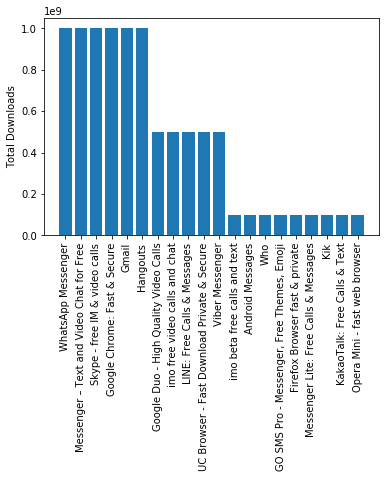

In [27]:
## Import necessary library
import numpy as np

## Create list of tuples with the number of downloads for each app in Communication genre
commmunication_table = []
for app in google_final:
    if app[1] == 'COMMUNICATION':
        key_val_as_tuple = (app[0], float(app[5].replace(',', '').replace('+', '')))
        commmunication_table.append(key_val_as_tuple)

## Print the total number of unique apps in this Genre
print('Total number of apps in this Genre:' , len(commmunication_table))

## Bar plot for the Communication genre (Keep only top 20 most popular apps)
### Sort in-place from highest to lowest
commmunication_table.sort(key=lambda x: x[1], reverse=True) 

### Save the first 20 apps and their respective downloads separately
### Reverse the tuples to go from most frequent to least frequent 
apps = list(zip(*commmunication_table[:20]))[0]
downloads = list(zip(*commmunication_table[:20]))[1]
x_pos = np.arange(len(apps))

### Create bar plot
plt.bar(x_pos, downloads,align='center')
plt.xticks(x_pos, apps, rotation=90) 
plt.ylabel('Total Downloads')
plt.show()

There are 287 apps in the Communication genre. There are several huge "players" (i.e. WhatsApp, Skype, Messenger, Hangouts, Google Chrome, Gmail etc.) in this genre that will be hard to compete against.

**2.1.2 Video Players**

Total number of apps in this Genre: 159


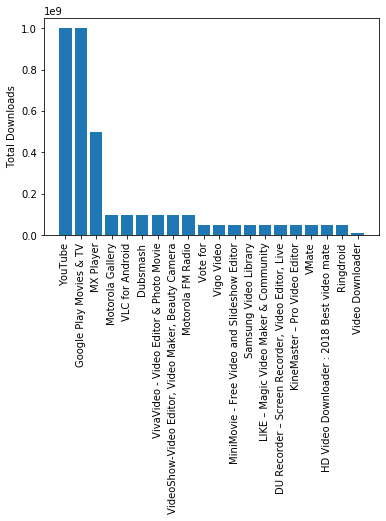

In [28]:
## Create list of tuples with the number of downloads for each app in Video Players genre
vdp_table = []
for app in google_final:
    if app[1] == 'VIDEO_PLAYERS':
        key_val_as_tuple = (app[0], float(app[5].replace(',', '').replace('+', '')))
        vdp_table.append(key_val_as_tuple)

## Print the total number of unique apps in this Genre
print('Total number of apps in this Genre:' , len(vdp_table))

## Bar plot for the Video Players genre (Keep only top 20 most popular apps)
### Sort in-place from highest to lowest
vdp_table.sort(key=lambda x: x[1], reverse=True) 

### Save the first 20 apps and their respective downloads separately
### Reverse the tuples to go from most frequent to least frequent 
apps = list(zip(*vdp_table[:20]))[0]
downloads = list(zip(*vdp_table[:20]))[1]
x_pos = np.arange(len(apps))

### Create bar plot
plt.bar(x_pos, downloads,align='center')
plt.xticks(x_pos, apps, rotation=90) 
plt.ylabel('Total Downloads')
plt.show()

**2.1.3 Social**

Total number of apps in this Genre: 236


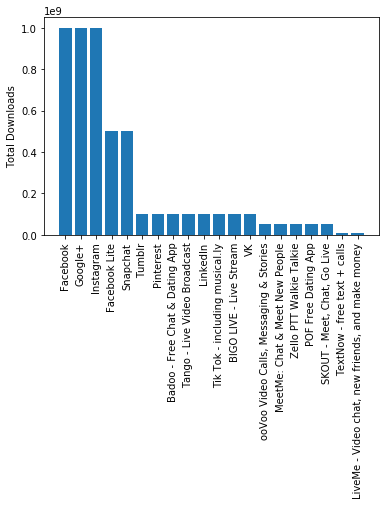

In [29]:
## Create list of tuples with the number of downloads for each app in Social genre
social_table = []
for app in google_final:
    if app[1] == 'SOCIAL':
        key_val_as_tuple = (app[0], float(app[5].replace(',', '').replace('+', '')))
        social_table.append(key_val_as_tuple)

## Print the total number of unique apps in this Genre
print('Total number of apps in this Genre:' , len(social_table))

## Bar plot for the Social genre (Keep only top 20 most popular apps)
### Sort in-place from highest to lowest
social_table.sort(key=lambda x: x[1], reverse=True) 

### Save the first 20 apps and their respective downloads separately
### Reverse the tuples to go from most frequent to least frequent 
apps = list(zip(*social_table[:20]))[0]
downloads = list(zip(*social_table[:20]))[1]
x_pos = np.arange(len(apps))

### Create bar plot
plt.bar(x_pos, downloads,align='center')
plt.xticks(x_pos, apps, rotation=90) 
plt.ylabel('Total Downloads')
plt.show()

**2.1.4 Photography**

Total number of apps in this Genre: 261


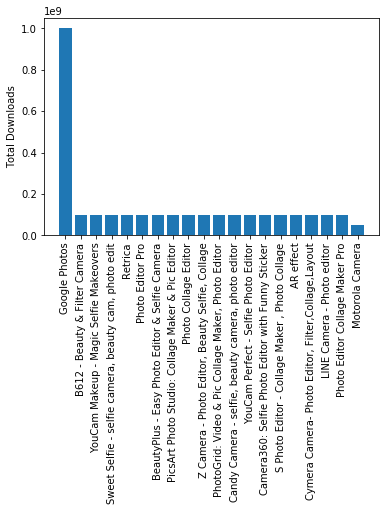

In [30]:
## Create list of tuples with the number of downloads for each app in Photography genre
photo_table = []
for app in google_final:
    if app[1] == 'PHOTOGRAPHY':
        key_val_as_tuple = (app[0], float(app[5].replace(',', '').replace('+', '')))
        photo_table.append(key_val_as_tuple)

## Print the total number of unique apps in this Genre
print('Total number of apps in this Genre:' , len(photo_table))

## Bar plot for the Photography genre (Keep only top 20 most popular apps)
### Sort in-place from highest to lowest
photo_table.sort(key=lambda x: x[1], reverse=True) 

### Save the first 20 apps and their respective downloads separately
### Reverse the tuples to go from most frequent to least frequent 
apps = list(zip(*photo_table[:20]))[0]
downloads = list(zip(*photo_table[:20]))[1]
x_pos = np.arange(len(apps))

### Create bar plot
plt.bar(x_pos, downloads,align='center')
plt.xticks(x_pos, apps, rotation=90) 
plt.ylabel('Total Downloads')
plt.show()

**2.1.5 Productivity**

Total number of apps in this Genre: 345


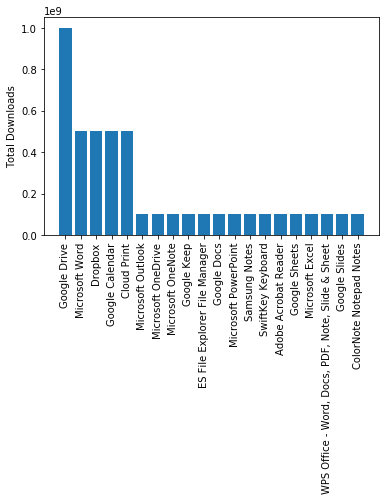

In [31]:
## Create list of tuples with the number of downloads for each app in Productivity genre
prod_table = []
for app in google_final:
    if app[1] == 'PRODUCTIVITY':
        key_val_as_tuple = (app[0], float(app[5].replace(',', '').replace('+', '')))
        prod_table.append(key_val_as_tuple)

## Print the total number of unique apps in this Genre
print('Total number of apps in this Genre:' , len(prod_table))

## Bar plot for the Productivity genre (Keep only top 20 most popular apps)
### Sort in-place from highest to lowest
prod_table.sort(key=lambda x: x[1], reverse=True) 

### Save the first 20 apps and their respective downloads separately
### Reverse the tuples to go from most frequent to least frequent 
apps = list(zip(*prod_table[:20]))[0]
downloads = list(zip(*prod_table[:20]))[1]
x_pos = np.arange(len(apps))

### Create bar plot
plt.bar(x_pos, downloads,align='center')
plt.xticks(x_pos, apps, rotation=90) 
plt.ylabel('Total Downloads')
plt.show()

**2.1.6 Games**

Total number of apps in this Genre: 862


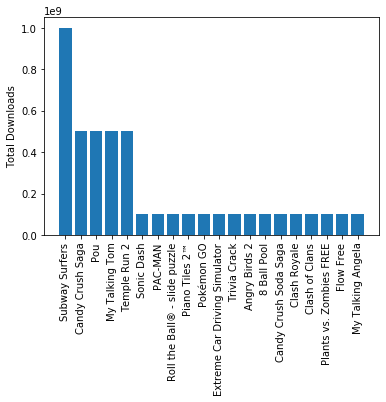

In [32]:
## Create list of tuples with the number of downloads for each app in Game genre
game_table = []
for app in google_final:
    if app[1] == 'GAME':
        key_val_as_tuple = (app[0], float(app[5].replace(',', '').replace('+', '')))
        game_table.append(key_val_as_tuple)

## Print the total number of unique apps in this Genre
print('Total number of apps in this Genre:' , len(game_table))

## Bar plot for the Game genre (Keep only top 20 most popular apps)
### Sort in-place from highest to lowest
game_table.sort(key=lambda x: x[1], reverse=True) 

### Save the first 20 apps and their respective downloads separately
### Reverse the tuples to go from most frequent to least frequent 
apps = list(zip(*game_table[:20]))[0]
downloads = list(zip(*game_table[:20]))[1]
x_pos = np.arange(len(apps))

### Create bar plot
plt.bar(x_pos, downloads,align='center')
plt.xticks(x_pos, apps, rotation=90) 
plt.ylabel('Total Downloads')
plt.show()

**2.1.7 Travel and Local**

Total number of apps in this Genre: 207


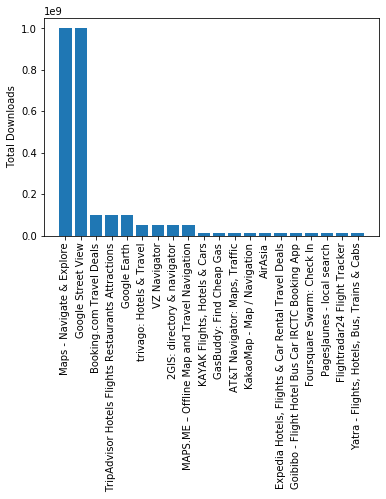

In [33]:
## Create list of tuples with the number of downloads for each app in Travel and Local genre
travel_table = []
for app in google_final:
    if app[1] == 'TRAVEL_AND_LOCAL':
        key_val_as_tuple = (app[0], float(app[5].replace(',', '').replace('+', '')))
        travel_table.append(key_val_as_tuple)

## Print the total number of unique apps in this Genre
print('Total number of apps in this Genre:' , len(travel_table))

## Bar plot for the Travel and Local genre (Keep only top 20 most popular apps)
### Sort in-place from highest to lowest
travel_table.sort(key=lambda x: x[1], reverse=True) 

### Save the first 20 apps and their respective downloads separately
### Reverse the tuples to go from most frequent to least frequent 
apps = list(zip(*travel_table[:20]))[0]
downloads = list(zip(*travel_table[:20]))[1]
x_pos = np.arange(len(apps))

### Create bar plot
plt.bar(x_pos, downloads,align='center')
plt.xticks(x_pos, apps, rotation=90) 
plt.ylabel('Total Downloads')
plt.show()

**2.1.8 Entertainment**

Total number of apps in this Genre: 85


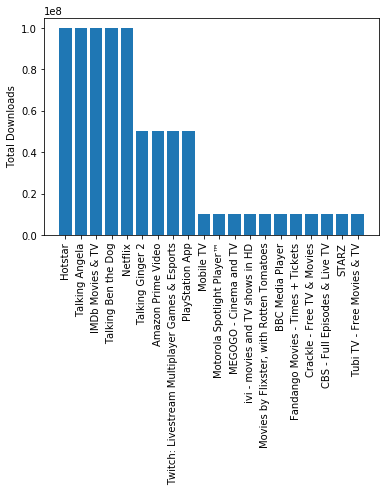

In [34]:
## Create list of tuples with the number of downloads for each app in Entertainment genre
entertain_table = []
for app in google_final:
    if app[1] == 'ENTERTAINMENT':
        key_val_as_tuple = (app[0], float(app[5].replace(',', '').replace('+', '')))
        entertain_table.append(key_val_as_tuple)

## Print the total number of unique apps in this Genre
print('Total number of apps in this Genre:' , len(entertain_table))

## Bar plot for the Entertainment genre (Keep only top 20 most popular apps)
### Sort in-place from highest to lowest
entertain_table.sort(key=lambda x: x[1], reverse=True) 

### Save the first 20 apps and their respective downloads separately
### Reverse the tuples to go from most frequent to least frequent 
apps = list(zip(*entertain_table[:20]))[0]
downloads = list(zip(*entertain_table[:20]))[1]
x_pos = np.arange(len(apps))

### Create bar plot
plt.bar(x_pos, downloads,align='center')
plt.xticks(x_pos, apps, rotation=90) 
plt.ylabel('Total Downloads')
plt.show()

**2.1.9 Tools**

Total number of apps in this Genre: 750


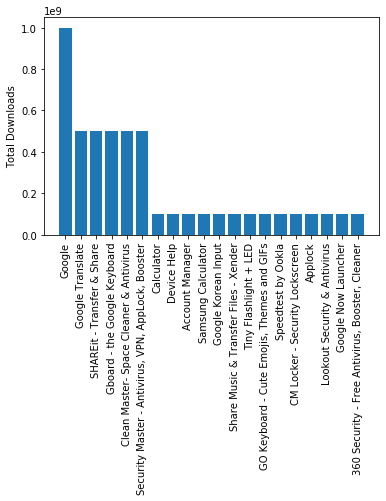

In [35]:
## Create list of tuples with the number of downloads for each app in Tools genre
tools_table = []
for app in google_final:
    if app[1] == 'TOOLS':
        key_val_as_tuple = (app[0], float(app[5].replace(',', '').replace('+', '')))
        tools_table.append(key_val_as_tuple)

## Print the total number of unique apps in this Genre
print('Total number of apps in this Genre:' , len(tools_table))

## Bar plot for the Tools genre (Keep only top 20 most popular apps)
### Sort in-place from highest to lowest
tools_table.sort(key=lambda x: x[1], reverse=True) 

### Save the first 20 apps and their respective downloads separately
### Reverse the tuples to go from most frequent to least frequent 
apps = list(zip(*tools_table[:20]))[0]
downloads = list(zip(*tools_table[:20]))[1]
x_pos = np.arange(len(apps))

### Create bar plot
plt.bar(x_pos, downloads,align='center')
plt.xticks(x_pos, apps, rotation=90) 
plt.ylabel('Total Downloads')
plt.show()

**2.1.10 News and Magazines**

Total number of apps in this Genre: 248


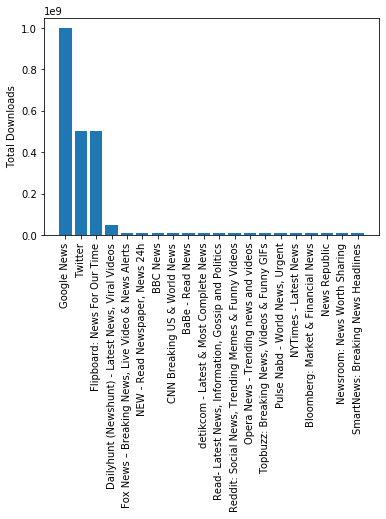

In [36]:
## Create list of tuples with the number of downloads for each app in News and Magazines genre
news_table = []
for app in google_final:
    if app[1] == 'NEWS_AND_MAGAZINES':
        key_val_as_tuple = (app[0], float(app[5].replace(',', '').replace('+', '')))
        news_table.append(key_val_as_tuple)

## Print the total number of unique apps in this Genre
print('Total number of apps in this Genre:' , len(news_table))

## Bar plot for the News and Magazines genre (Keep only top 20 most popular apps)
### Sort in-place from highest to lowest
news_table.sort(key=lambda x: x[1], reverse=True) 

### Save the first 20 apps and their respective downloads separately
### Reverse the tuples to go from most frequent to least frequent 
apps = list(zip(*news_table[:20]))[0]
downloads = list(zip(*news_table[:20]))[1]
x_pos = np.arange(len(apps))

### Create bar plot
plt.bar(x_pos, downloads,align='center')
plt.xticks(x_pos, apps, rotation=90) 
plt.ylabel('Total Downloads')
plt.show()

Conclusions on the following Genres:
* **Video Players**: There are 159 apps in this genre, which means that there could be room for a new app. However, there are "big player" apps, such as Youtube and Google Play, which have more than 1 billion downloads each. Third comes MX Player with 500 million downloads. With 100 million downloads we have VivaVideo, VideoShow, VLC, Motorola Gallery, Motorola FM Radio and Dubsmash.
* **Social**: There are 236 apps in this genre. This market is dominated by Instagram, Facebook, Google+ and Snapchat. It will be hard to compete against these apps.
* **Photography**: There are 261 apps in this genre. This market is dominated by Google Photos. Apart from the aforementioned app, there are several mobile camera related or photo editor apps. There are several apps in this category and the company should avoid it, unless it can work with a "big name" camera brand (such as Canon, Nikon or Sony) in order to be able to use that name for branding / extra exposure. Something similar has happened for the Motorolla Camera app that has more than 50 million downloads.
* **Productivity**: There are 345 apps in this genre. This genre is dominated by Google, with apps like Google Drive and Google Calendar. Other applications are related to office word, such as Word, Excel, PowerPoint etc. Cloud services such as Dropbox and Cloud Print, also dominate this genre. There is little room for improving the already existing apps and the cost of such project does not justify the possible gains.
* **Game**: There are 862 apps in this genre. Although this field is the easiest to get into, there are so many apps that this category could be considered saturated. As a result a new gaming app should be avoided.
* **Travel and Local**: There are 207 apps in this genre. This field is dominated by Google, with apps like Google Maps and Google Street. Travel related applications, such as TripAvisor and Booking will be very hard to compete against, as they have already established a significant user base.
* **Entertainment**: There are 85 apps in this genre, which means that there could be room for a new app. There are only 5 apps with more than 100 million downloads (i.e. Talking Ben the Dog, Talking Angela, Netflix, IMDb Movies & TV, Hotstar). Also, there are no entertainment apps with under 10 thousand downloads. This means that this could potentially be a good field for a new app.
* **Tools**: There are 750 apps in this genre. Like "Game" category, this genre seems saturated and a new tool app should be avoided.
* **News and Magazines**: There are 248 apps in this genre. In this category, the most popular app is Google News with more than 1 billion downloads. Then, there are Twitter, Flipboard and Dailyhunt with more than 500 million downloads each. To get in this field, the company should collaborate with a well known newspaper or magazine, that does not have already its own app. This could be difficult to achieve.

**General Note**: There seems to be outliers in each genre that could impact our analysis. 

**Next Steps**: Remove the outliers in each genre and explore the data again.

#### 2.2 Most popular apps by Genre for Apple Store

In [37]:
## Function that returns the average rating count by genre (as dictionary) using the freq_table() function
def avg_rating_table(dataset, index):
    store_genre = freq_table(dataset, index)
    avg_genre_rating = {}
    for genre in store_genre:
        total = 0
        genre_rating_count = 0
        for app in dataset:
            genre_app = app[11]
            if genre_app == genre:
                genre_rating_count += float(app[5])
                total += 1
        avg_genre_rating[genre] = genre_rating_count / total
    return avg_genre_rating


## Function that generates an average rating count by genre table using the avg_rating_table() function. 
## Transforms the frequency table into a list of tuples, then sorts the list in a descending order.
## Prints the entries of the frequency table in descending order.
def display_avg_rating_table(dataset, index):
    table = avg_rating_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)

    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0])
        
        
display_avg_rating_table(ios_final, 11)

Navigation : 86090.33333333333
Reference : 74942.11111111111
Social Networking : 71548.34905660378
Music : 57326.530303030304
Weather : 52279.892857142855
Book : 39758.5
Food & Drink : 33333.92307692308
Finance : 31467.944444444445
Photo & Video : 28441.54375
Travel : 28243.8
Shopping : 26919.690476190477
Health & Fitness : 23298.015384615384
Sports : 23008.898550724636
Games : 22812.92467948718
News : 21248.023255813954
Productivity : 21028.410714285714
Utilities : 18684.456790123455
Lifestyle : 16485.764705882353
Entertainment : 14029.830708661417
Business : 7491.117647058823
Education : 7003.983050847458
Catalogs : 4004.0
Medical : 612.0


The most popular app genre seems to be **"Reference"** apps. The metric used to determine the most popular app genre is the average user rating count by genre.

Let's have a closer look to the "Reference" and "Social Networking" genre

**2.2.1 Reference**

Total number of apps in this Genre: 18


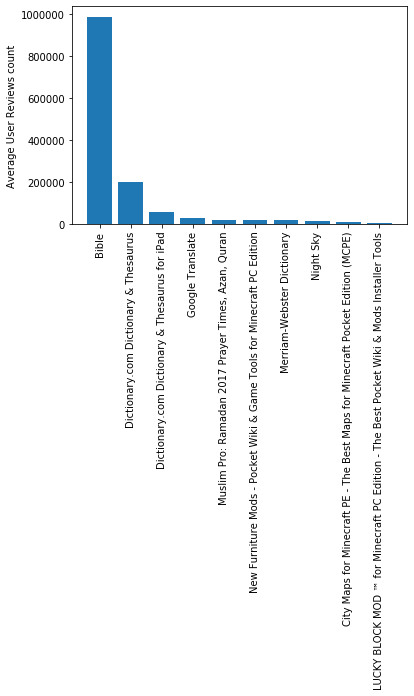

In [38]:
## Create list of tuples with the number of Average User Reviews count for each app in Reference genre
reference_table = []
for app in ios_final:
    if app[11] == 'Reference':
        key_val_as_tuple = (app[1], float(app[5]))
        reference_table.append(key_val_as_tuple)

## Print the total number of unique apps in this Genre
print('Total number of apps in this Genre:' , len(reference_table))

## Bar plot for the Reference genre (Keep only top 10 most popular apps)
### Sort in-place from highest to lowest
reference_table.sort(key=lambda x: x[1], reverse=True) 

### Save the first 10 apps and their respective Average User Reviews count separately
### Reverse the tuples to go from most frequent to least frequent 
apps = list(zip(*reference_table[:10]))[0]
downloads = list(zip(*reference_table[:10]))[1]
x_pos = np.arange(len(apps))

### Create bar plot
plt.bar(x_pos, downloads,align='center')
plt.xticks(x_pos, apps, rotation=90) 
plt.ylabel('Average User Reviews count')
plt.show()

**2.2.2 Social Networking**

Total number of apps in this Genre: 106


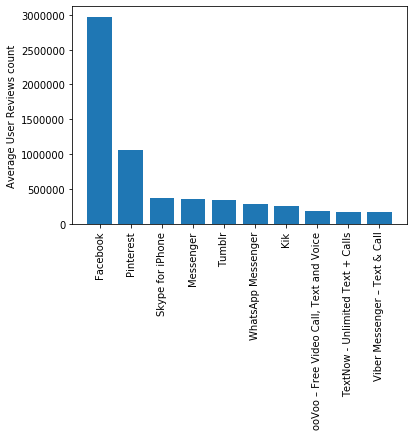

In [39]:
## Create list of tuples with the number of Average User Reviews count for each app in Social Networking genre
social_table = []
for app in ios_final:
    if app[11] == 'Social Networking':
        key_val_as_tuple = (app[1], float(app[5]))
        social_table.append(key_val_as_tuple)

## Print the total number of unique apps in this Genre
print('Total number of apps in this Genre:' , len(social_table))

## Bar plot for the Social Networking genre (Keep only top 10 most popular apps)
### Sort in-place from highest to lowest
social_table.sort(key=lambda x: x[1], reverse=True) 

### Save the first 10 apps and their respective Average User Reviews count separately
### Reverse the tuples to go from most frequent to least frequent 
apps = list(zip(*social_table[:10]))[0]
downloads = list(zip(*social_table[:10]))[1]
x_pos = np.arange(len(apps))

### Create bar plot
plt.bar(x_pos, downloads,align='center')
plt.xticks(x_pos, apps, rotation=90) 
plt.ylabel('Average User Reviews count')
plt.show()

**2.2.3 Entertainment**

Total number of apps in this Genre: 254


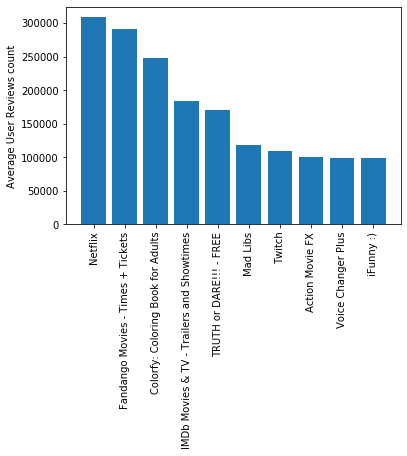

In [40]:
## Create list of tuples with the number of Average User Reviews count for each app in Entertainment genre
ent_table = []
for app in ios_final:
    if app[11] == 'Entertainment':
        key_val_as_tuple = (app[1], float(app[5]))
        ent_table.append(key_val_as_tuple)

## Print the total number of unique apps in this Genre
print('Total number of apps in this Genre:' , len(ent_table))

## Bar plot for the Entertainment genre (Keep only top 10 most popular apps)
### Sort in-place from highest to lowest
ent_table.sort(key=lambda x: x[1], reverse=True) 

### Save the first 10 apps and their respective Average User Reviews count separately
### Reverse the tuples to go from most frequent to least frequent 
apps = list(zip(*ent_table[:10]))[0]
downloads = list(zip(*ent_table[:10]))[1]
x_pos = np.arange(len(apps))

### Create bar plot
plt.bar(x_pos, downloads,align='center')
plt.xticks(x_pos, apps, rotation=90) 
plt.ylabel('Average User Reviews count')
plt.show()

## App profile recommendation

Based on the above information, the most suitable app should be categorized as "Entertainment". As has been seen in the Google Play Store, there is room to develop a new app in this category.
The company should prepare an app that meets a demand that is not fully supported by already developed apps. 
An idea would be to create an app that combines the most popular entertainment applications. In this app, the user will be able to:
1. Find which movies or series to watch and allow the user to select the provider for his selection(s).
2. Identify if it is cheaper to download the product or stream it.
3. Create a talking avatar that the user will be able to interact with. The avatar will be able to memorize the favourite movies/series/anime and based on them, propose other material that the user could possibly like. The avatar will also have a movies/series calendar, where it will inform the user when the next episode of an ongoing series is going to be or when a new movie will be provided through the online providers.
4. Rate movies/series/anime and provide reviews, which will be rated by the users. The user's avatar will be able to "talk" to the user and specify the most positive and most negative reviews based on the user ratings.

Furthermore, other features could be that, based on user activity, the user will be able to purchase some movies/series/anime for free (based on the companies agreement with other providers).

The main source of income will be in-app adds, which the user will be able to disable with a monthly subscription.

## Conclusion

In this project, we analyzed data about the App Store and Google Play mobile apps with the goal of recommending an app profile that can be profitable for both markets (giving priority to Google Play Store, as the app will first be launched there).

We concluded that an application that includes a list of movies, series etc. from different providers and a talking avatar (helper) could be profitable for both Google Play Store and Apple Store. There is no application that has all the available movies, series etc. from all the providers, along with related prices for streaming and downloading options, the talking avatar (like Talking Tom) and the rating system of IMDB. So, this could be a chance to prepare all in one app that could compete with each related applications.